# Deep Computer Vision Using Convolutional Neural Networks:

# A. Convolutional Layers:

* A convolution is a mathematical operation that slides one function over another and measures the integral of their pointwise multiplication. It has deep connections with the Fourier transform and the Laplace transform and is heavily used in signal processing. Convolutional layers actually use cross-correlations, which are very similar to convolution

* The most important building block of a CNN is the convolutional layer: 
    * Neurons in the first convolutional layer are not connected to every single pixel in the input image , but only to pixels in their receptive fields. <br>
    &emsp; 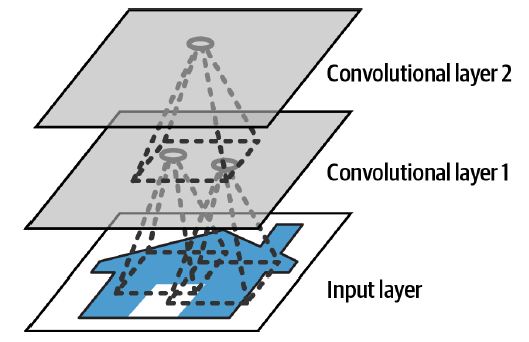 <br>
    * In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer.
    * This architecture allows the network to concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer, and so on.

* A neuron located in row $i$, column $j$ of a given layer is connected to the outputs of the neurons in the previous layer located in rows $i$ to $i + f_h – 1$, columns $j$ to $j + f_w – 1$, where $f_h$ and $f_w$ are the height and width of the receptive field. <br>
    * In order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs, as shown in the diagram. This is called zero padding. <br>
    &emsp; 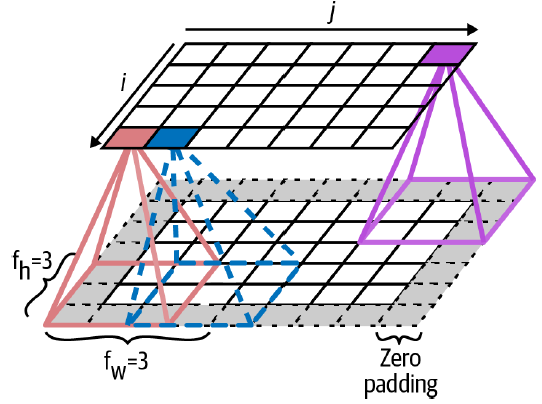 <br>

    * It is also possible to connect a large input layer to a much smaller layer by spacing out the receptive fields. This dramatically reduces the model’s computational complexity. The horizontal or vertical step size from one receptive field to the next is called the stride.
    <br>
    &emsp; 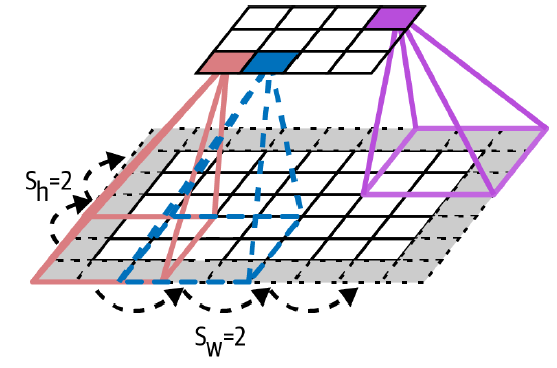 <br>

### A.1 Filters:
* A neuron's weights can be represented as a small image the size of the receptive field. 
* Filters (or convolutional kernels, kernels) are set of weights.
    * A layer full of neurons using the same filter outputs a **feature map**, w/c highlights the areas in an image that activate the filter the most.
    * During training, the convolutional layer will automatically learn the most useful filters for its task, and the layers above will learn to combine them into more complex patterns. <br>
    &emsp; 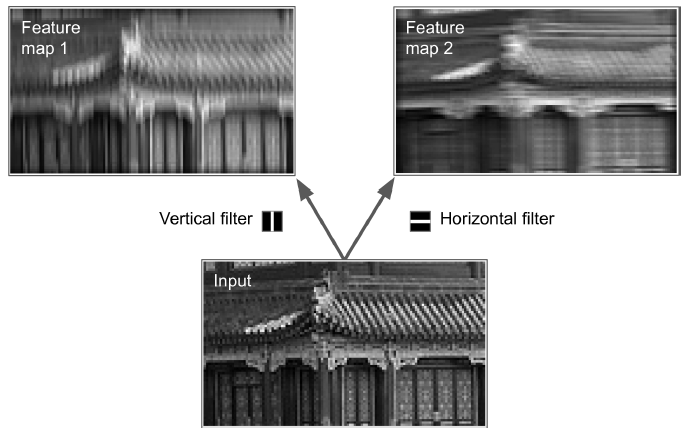 <br>

### A.2 Stacking Multiple Feature Maps:

* In reality, a convolutional layer has multiple filters (you decide how many) and outputs one feature map per filter.
    * Conv. layer has one neuron per pixel in each feature map, and all neurons w/in a given feature map share the same parameters (i.e., the same kernel and bias term).
    * Neurons in different feature maps use different parameters.
    * A neuron's receptive field extends across all the feature maps of the previous layer.
    * In short, a convolutional layer simultaneously applies multiple trainable filters to its inputs, making it capable of detecting multiple features anywhere in its inputs. <br>
    &emsp; 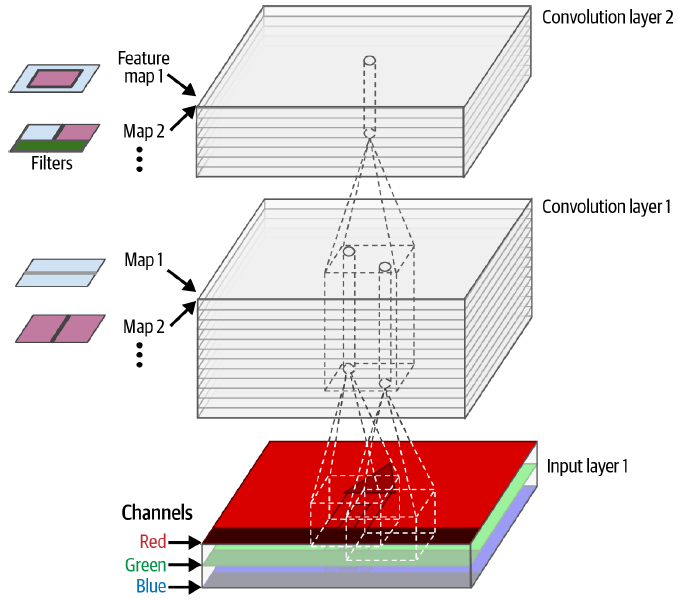 <br>

* The fact that all neurons in a feature map share the same parameters dramatically reduces the number of parameters in the model. 
    * Once the CNN has learned to recognize a pattern in one location, it can recognize it in any other location.
    * In contrast, once a fully connected neural network has learned to recognize a pattern in one location, it can only recognize it in that particular location.

* Input images are also composed of multiple sublayers: one per color channel. 
